## Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


## Read Dataset to python Environment

In [2]:
Path = '../Unknown/'
Train = 'exercise_03_train.csv'
Test = 'exercise_03_test.csv'
dfTrain = pd.read_csv(Path+Train)
dfTest = pd.read_csv(Path+Test)

## Getting information about the data frame 

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [4]:
pd.set_option('display.max_columns', 120) #Restricting the output from been truncated
dfTrain.describe(include = 'all') # More information

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39994.000000,39990.000000,39993.000000,39991.000000,39993.000000,39991.000000,39993.000000,39992.000000,39991.000000,39992.000000,39988.000000,39986.000000,39996.000000,39993.000000,39992.000000,39988.000000,39986.000000,39991.000000,39993.000000,39989.000000,39995.000000,39993.000000,39989.000000,39992.000000,39992.000000,39992.000000,39990.000000,39996.000000,39996.000000,39992.000000,39995.000000,39991.000000,39993,39991,39994.000000,39996.000000,39994.000000,39993.000000,39995.000000,39994,39990.000000,39998.000000,39996.000000,39995,39990.000000,39995.000000,39991.000000,39994.000000,39996.000000,39987.000000,39989.000000,39995.000000,39997.000000,39987.000000,39992.000000,39991.000000,39992.000000,39991.000000,39989.000000,39992.000000,39989.000000,39988.000000,39994.000000,39986.000000,39989.000000,39992.000000,39990,39988.000000,39995.000000,39996.000000,39991.000000,39992.000000,39992.000000,39993.000000,39993.000000,39990.000000,39992.000000,39992.000000,39995.000000,39994.000000,39994.000000,39998.000000,39997.000000,39985.000000,39990.000000,39993.000000,39997.000000,39988.000000,39993.000000,39998.000000,39993.000000,39994,39991.000000,39994.000000,39987.000000,39988.000000,39993.000000,39989.000000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,37824,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,volkswagon,wed,NaN,NaN,NaN,NaN,NaN,$-1073.04,NaN,NaN,NaN,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12610,14775,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,9640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.170164,-0.058983,1.639221,-0.815620,0.330524,-0.849090,-0.001158,-0.035723,-7.858543,-0.057514,7.725413,0.001757,-1.292777,0.001083,-0.005280,0.029036,-0.009168,-0.002246,0.820214,-0.000545,0.113387,4.021114,-1.021379,-0.006175,0.018025,0.271022,0.017768,9.801955,-0.013635,0.000164,-0.086003,0.043602,0.010439,-1.997013,NaN,NaN,0.012242,3.561921,0.003799,0.016293,1.711370,NaN,-1.960871,0.027996,-34.888080,NaN,0.022563,0.027504,0.012854,0.021384,4.346635,-6.917868,-0.013081,0.108675,-0.026513,0.102254,-0.566671,-0.054278,-0.446970,0.004736,0.026271,0.093144,-0.047512,-3.389009,0.002640,-0.018587,-0.107805,-0.012602,NaN,-16.324910,6.691733,0.308271,-3.068872,-4.773991,0.067168,5.290885,0.022417,-0.218028,-0.712122,1.672661,-0.045729,-0.015032,-0.026933,1.880606,-0.020209,-6.127721,0.040984,0.017975,-0.006529,0.015639,-14.261568,0.004626,-0.014280,NaN,-0.055800,-0.016031,-0.505100,-1.065555,0.004239,0.301483,0.202200
std,108.214096,0.276964,36.483433,16.661057,41.008110,21.212786,0.740514,6.636854,35.469358,6.267267,41.798849,0.286912,5.200432,0.818178,1.736482,9

**From the above, we learn that there are 39999 entries and 101 features. Based on the information we can tell some of the features are missing some entries and we also know the number of categorical features, which are: x34, x35, x41, x45, x68, and x93.**

In [5]:
pd.set_option('display.max_columns', 120) 
print(dfTrain.head()) # looking at the first 5 entries of the data just to undertsand the excat data we are dealing with
print(dfTrain.tail()) # likewise the last 5 entries

           x0        x1         x2         x3         x4         x5        x6  \
0   83.812330 -0.122672  65.391785   6.323478 -18.511031   2.122648  0.319472   
1   -0.445312 -0.436077  12.981759  30.716674 -34.981679 -16.712862  0.530105   
2   82.927148  0.075277 -29.096012 -20.176841  10.109713 -45.994005  0.618132   
3  370.736586 -0.263338 -75.273905 -21.765844 -72.478339  -8.701108  0.332586   
4   33.775263 -0.270047 -40.486723   3.990431 -13.733621  -6.185321 -0.733206   

         x7         x8        x9         x10       x11       x12       x13  \
0  7.650422   7.713315  2.789856    3.161937  0.314606 -2.337769  0.346473   
1  8.740222  56.044533  0.075118  -37.992717 -0.165275 -3.566991 -0.509367   
2  7.757838 -69.749060 -1.561335  116.410969  0.192342 -7.645987  0.965640   
3  2.769763 -35.815423  5.230400  126.279854 -0.120964 -4.147042 -0.560841   
4 -3.325673  -5.055036 -4.331587  -45.863430 -0.015552 -1.097488  0.467696   

        x14       x15       x16       x17   

**Looking at some portion of the actual dataset shows that some of the variables that were deemed as categorical are not, will transform them to their actual data type**

In [6]:
#dropping the $ and % sign 
dfTrain['x41'] = dfTrain['x41'].replace('[\$,]', '', regex=True).astype(float)
dfTrain['x45'] = dfTrain['x45'].replace('[\%,]', '', regex=True).astype(float)

In [7]:
#Doing the same for the Test dataset
dfTest['x41'] = dfTest['x41'].replace('[\$,]', '', regex=True).astype(float)
dfTest['x45'] = dfTest['x45'].replace('[\%,]', '', regex=True).astype(float)

In [8]:
#After dropping the % sign need to transform variable as appropriate
dfTrain['x45'] = dfTrain['x45'].div(100)

In [9]:
#Test Dataset
dfTest['x45'] = dfTest['x45'].div(100)

In [10]:
pd.set_option('display.max_columns', 120) #Restricting the output from been truncated
dfTrain.describe(include = 'all') # More information

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39994.000000,39990.000000,39993.000000,39991.000000,39993.000000,39991.000000,39993.000000,39992.000000,39991.000000,39992.000000,39988.000000,39986.000000,39996.000000,39993.000000,39992.000000,39988.000000,39986.000000,39991.000000,39993.000000,39989.000000,39995.000000,39993.000000,39989.000000,39992.000000,39992.000000,39992.000000,39990.000000,39996.000000,39996.000000,39992.000000,39995.000000,39991.000000,39993,39991,39994.000000,39996.000000,39994.000000,39993.000000,39995.000000,39994.000000,39990.000000,39998.000000,39996.000000,3.999500e+04,39990.000000,39995.000000,39991.000000,39994.000000,39996.000000,39987.000000,39989.000000,39995.000000,39997.000000,39987.000000,39992.000000,39991.000000,39992.000000,39991.000000,39989.000000,39992.000000,39989.000000,39988.000000,39994.000000,39986.000000,39989.000000,39992.000000,39990,39988.000000,39995.000000,39996.000000,39991.000000,39992.000000,39992.000000,39993.000000,39993.000000,39990.000000,39992.000000,39992.000000,39995.000000,39994.000000,39994.000000,39998.000000,39997.000000,39985.000000,39990.000000,39993.000000,39997.000000,39988.000000,39993.000000,39998.000000,39993.000000,39994,39991.000000,39994.000000,39987.000000,39988.000000,39993.000000,39989.000000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,volkswagon,wed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12610,14775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.170164,-0.058983,1.639221,-0.815620,0.330524,-0.849090,-0.001158,-0.035723,-7.858543,-0.057514,7.725413,0.001757,-1.292777,0.001083,-0.005280,0.029036,-0.009168,-0.002246,0.820214,-0.000545,0.113387,4.021114,-1.021379,-0.006175,0.018025,0.271022,0.017768,9.801955,-0.013635,0.000164,-0.086003,0.043602,0.010439,-1.997013,NaN,NaN,0.012242,3.561921,0.003799,0.016293,1.711370,-3.286587,-1.960871,0.027996,-34.888080,3.100388e-07,0.022563,0.027504,0.012854,0.021384,4.346635,-6.917868,-0.013081,0.108675,-0.026513,0.102254,-0.566671,-0.054278,-0.446970,0.004736,0.026271,0.093144,-0.047512,-3.389009,0.002640,-0.018587,-0.107805,-0.012602,NaN,-16.324910,6.691733,0.308271,-3.068872,-4.773991,0.067168,5.290885,0.022417,-0.218028,-0.712122,1.672661,-0.045729,-0.015032,-0.026933,1.880606,-0.020209,-6.127721,0.040984,0.017975,-0.006529,0.015639,-14.261568,0.004626,-0.014280,NaN,-0.055800,-0.016031,-0.505100,-1.065555,0.004239,0.301483,0.202200
std,108.214096,0.276964,36.483433,16.661057,41.008110,21.212786,0.740514,6.636854,35.469358,6.267267,41.798849,0.286912,5.20043

In [11]:
pd.set_option('display.max_rows', 120) 
len(dfTrain) - dfTrain.count() # Counting the number of entries every feature is missing

x0     11
x1     10
x2      6
x3     10
x4      7
x5      9
x6      7
x7      9
x8      7
x9      8
x10     9
x11     8
x12    12
x13    14
x14     4
x15     7
x16     8
x17    12
x18    14
x19     9
x20     7
x21    11
x22     5
x23     7
x24    11
x25     8
x26     8
x27     8
x28    10
x29     4
x30     4
x31     8
x32     5
x33     9
x34     7
x35     9
x36     6
x37     4
x38     6
x39     7
x40     5
x41     6
x42    10
x43     2
x44     4
x45     5
x46    10
x47     5
x48     9
x49     6
x50     4
x51    13
x52    11
x53     5
x54     3
x55    13
x56     8
x57     9
x58     8
x59     9
x60    11
x61     8
x62    11
x63    12
x64     6
x65    14
x66    11
x67     8
x68    10
x69    12
x70     5
x71     4
x72     9
x73     8
x74     8
x75     7
x76     7
x77    10
x78     8
x79     8
x80     5
x81     6
x82     6
x83     2
x84     3
x85    15
x86    10
x87     7
x88     3
x89    12
x90     7
x91     2
x92     7
x93     6
x94     9
x95     6
x96    13
x97    12
x98     7
x99    11


In [12]:
#Copying the data for preprocessing so that if I need to revert I will have a reference point
ImputDf = dfTrain.copy()

**From the above none of features is missing more than 20% percent of its entries  hence we will replace the missing entries with imputation methods**

Imputation / Missing Values <br>
Could use sophisticated imputation libraries like fancy impute but data is too big for the computer memory I am using to use those libraries but below are the could I could have used.<br>
Columns = ImputDf.select_dtypes(exclude=[object])<br>
#Using nearest rows which have a feature to fill in each row's<br>
#missing features<br>
Imput = ImputDf.select_dtypes(exclude=[object]).as_matrix()<br>
Imput = pd.DataFrame(KNN().fit_transform(Imput), columns=Columns.columns, index =Columns.index)<br>

Hence I am using mean for the continuous and mode for categorial features

In [13]:
Imput = ImputDf.select_dtypes(exclude=[object])

In [14]:
#imputing the continuous features 
Imput = Imput.fillna(Imput.mean())

In [15]:
#Drop continuous features from original dataframe then reaatach the dataframe that has the imputed values
ImputA = ImputDf.select_dtypes(include=[object])

#Imput is the dataframe w/ imputed vars
Imputdf = Imput.join(ImputA)

In [16]:
#Impute the categorial features
Imputdf.loc[Imputdf['x34'].isnull(), 'x34'] = Imputdf['x34'].mode().values[0]
Imputdf.loc[Imputdf['x35'].isnull(), 'x35'] = Imputdf['x35'].mode().values[0]
Imputdf.loc[Imputdf['x68'].isnull(), 'x68'] = Imputdf['x68'].mode().values[0]
Imputdf.loc[Imputdf['x93'].isnull(), 'x93'] = Imputdf['x93'].mode().values[0]

In [17]:
len(Imputdf) - Imputdf.count() # Counting the number of entries every feature is missing

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
x67    0
x69    0
x70    0
x71    0
x72    0
x73    0
x74    0
x75    0
x76    0
x77    0
x78    0
x79    0
x80    0
x81    0
x82    0
x83    0
x84    0
x85    0
x86    0
x87    0
x88    0
x89    0
x90    0
x91    0
x92    0
x94    0
x95    0
x96    0
x97    0
x98    0
x99    0
y      0
x34    0
x35    0
x68    0
x93    0
dtype: int64

In [18]:
Imputdf['y'].value_counts()

0    31912
1     8088
Name: y, dtype: int64

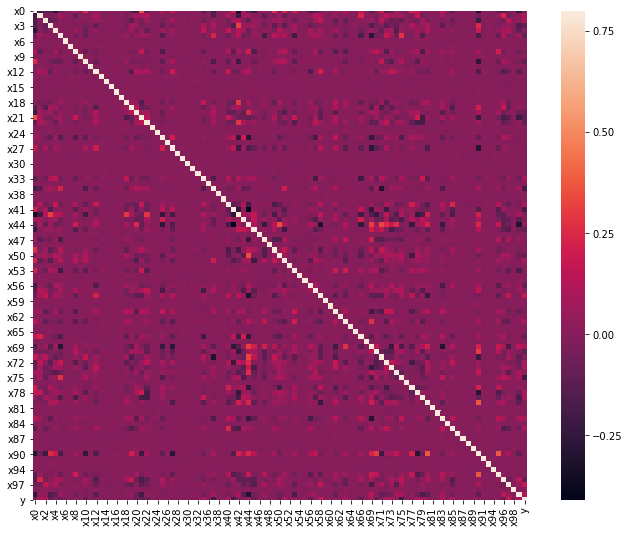

In [35]:
corrmat = Imputdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

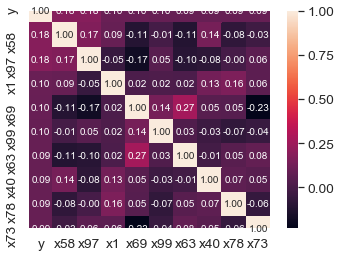

In [36]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(Imputdf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

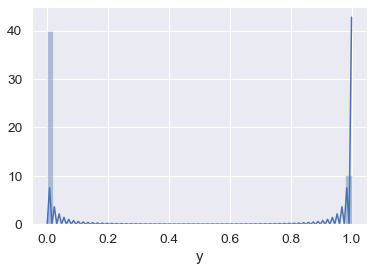

In [37]:
sns.distplot(Imputdf['y']);

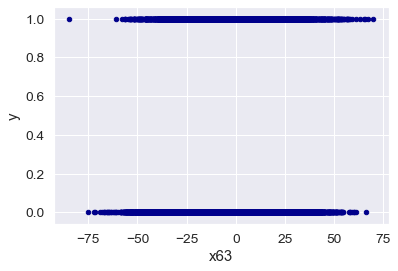

In [38]:
 ax1 = Imputdf.plot.scatter(x='x63',
                      y='y',
                       c='DarkBlue')

**We can tell there is a problem of unbalance in the output and for that matter,  evaluation metrics I very important as well as model parameters, for simplicity I will consider Cross-Validation to help rectify the problem unbalance dataset imposes**

### Separating the dataset to dependent and independent variables 

In [19]:
Dependent = Imputdf['y']
Independent = Imputdf.drop(['y'], axis=1)

**Encode categorical features**

In [20]:
Independent = pd.get_dummies(Independent)

In [21]:
Testset = pd.get_dummies(dfTest)

In [22]:
Independent.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,...,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_fri,x35_friday,x35_monday,x35_thur,x35_thurday,x35_tuesday,x35_wed,x35_wednesday,x68_Apr,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe
0,83.812330,-0.122672,65.391785,6.323478,-18.511031,2.122648,0.319472,7.650422,7.713315,2.789856,3.161937,0.314606,-2.337769,0.346473,-0.034445,6.846460,-1.432359,-2.201084,-3.354706,-14.928499,-0.508166,18.000683,-7.417965,0.630054,-4.637193,-44.558764,11.845979,10.375184,-3.198000,-1.386096,9.219494,11.276351,-10.490478,-4.955304,0.912923,1.447599,7.223553,6.345453,-12.853527,229.47,-73.696118,-2.739030,23.206414,0.0000,-7.312450,4.036468,-1.269211,15.902179,25.264524,-19.944331,-8.155119,0.518441,-3.452840,3.477219,5.028244,-0.766853,0.970404,-6.553208,-1.694899,-37.704064,...,-3.272041,-31.271870,-12.342707,-24.727017,-3.950582,-28.817173,-2.383631,54.853290,-21.780661,-2.542505,-5.802268,-56.498694,-9.580207,12.248465,7.674024,0.050937,5.913765,1.970939,-144.208496,5.482352,12.211997,-3.201565,-9.837196,-21.092011,4.671140,0.588994,-11.417083,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,-0.445312,-0.436077,12.981759,30.716674,-34.981679,-16.712862,0.530105,8.740222,56.044533,0.075118,-37.992717,-0.165275,-3.566991,-0.509367,2.810061,-5.014334,-0.248782,3.993480,2.023831,-11.334563,-0.882649,-20.426731,-4.132525,-0.755783,-3.195466,27.074335,-0.122106,-19.731409,-0.587150,0.576996,5.362257,-18.287779,11.000913,-4.464928,-1.909344,-22.820981,1.659441,1.335120,21.662360,213.90,161.950929,14.230611,-170.533210,-0.0000,-1.900118,33.197063,0.669210,-17.165298,14.336000,-6.874649,-3.768920,-21.925943,2.834963,-6.932305,-11.479294,-4.539812,-1.717179,2.649737,0.940187,20.754071,...,-3.960816,-6.953864,-12.121296,13.857537,-23.018404,27.170559,-0.024138,-42.196071,8.335470,5.435904,-7.922957,77.412079,-5.405357,-4.513079,-2.398428,1.761859,-2.619810,-9.045592,148.348086,-6.083035,-5.098374,5.433036,91.724841,4.305371,4.329130,0.371513,8.474528,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,82.927148,0.075277,-29.096012,-20.176841,10.109713,-45.994005,0.618132,7.757838,-69.749060,-1.561335,116.410969,0.192342,-7.645987,0.965640,1.074688,-3.301405,1.750239,7.658523,-3.546696,-18.506079,-0.614946,47.179031,5.215522,1.347929,0.744635,-31.950503,-4.809379,-27.861889,-0.054064,-1.557694,14.415605,3.122563,-0.635359,-10.421105,-3.131930,10.095960,-0.690880,2.504871,-4.413666,2207.13,-105.242685,-7.087897,-81.760391,-0.0002,4.915974,-6.845058,-0.228783,-38.756694,11.879903,-71.294059,-2.889067,17.590918,2.893195,-10.295296,22.774447,-10.388426,-3.399829,-4.831446,17.547855,42.527355,...,26.352788,40.813441,19.715767,17.466146,-1.239946,-78.163037,-0.021548,-10.996892,40.412330,6.621187,-3.107994,23.844594,-7.680864,43.118893,7.351277,-0.375599,-8.408146,6.285944,-76.239072,0.200787,-7.174907,2.595005,-14.630603,-3.743052,-14.820376,-2.366675,2.613091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,370.736586,-0.263338,-75.273905,-21.765844,-72.478339,-8.701108,0.332586,2.769763,-35.815423,5.230400,126.279854,-0.120964,-4.147042,-0.560841,1.196674,0.094986,1.097013,-2.590958,5.693419,-41.960069,-0.161400,42.600594,-3.005460,1.021954,-2.027826,-12.732195,-8.854023,-30.366066,12.783482,1.943701,4.834265,-1.183167,0.671143,-5.032338,-4.322898,0.317175,-4.903652,4.701032,-45.327546,82.09,-90.507566,-20.113745,-143.896780,-0.0000,-5.688367,32.806852,-1.695647,12.248845,-2.186258,32.133978,-7.229061,3.083700,0.477472,

In [23]:
# Saving feature names for later use
Variables = list(Independent.columns)

**Standardize the Features**

In [24]:
#So that variables measured at different scales do contribute equally to the analysis
Standardize = StandardScaler().fit(Independent)
Independent = Standardize.transform(Independent)

In [25]:
StandardizeTest = StandardScaler().fit(Testset)
Testset = StandardizeTest.transform(Testset)

## Using Random Forest Classifier for Feature Selection 
**Since the dataset did not come with enough information to based on it for feature engineering or selection I will use random forest classifier and use  feature importance from the model for features for the predictive model**

In [26]:
RandomForest = RFC(random_state = 1234)
RandomForest.fit(Independent, Dependent)

C:\Users\CHERPENS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [27]:
# Get numerical feature Importances
Importances = list(RandomForest.feature_importances_)
# List of tuples with variable and importance
feature_Importances = [(feature, round(importance, 2)) for feature, importance in zip(Variables, Importances)]
# Sort the feature Importances by most important first
feature_Importances = sorted(feature_Importances, key = lambda x: x[1], reverse = True)
# Print out the feature and Importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_Importances];

Variable: x37                  Importance: 0.03
Variable: x41                  Importance: 0.03
Variable: x58                  Importance: 0.03
Variable: x75                  Importance: 0.03
Variable: x1                   Importance: 0.02
Variable: x3                   Importance: 0.02
Variable: x12                  Importance: 0.02
Variable: x21                  Importance: 0.02
Variable: x44                  Importance: 0.02
Variable: x50                  Importance: 0.02
Variable: x56                  Importance: 0.02
Variable: x63                  Importance: 0.02
Variable: x66                  Importance: 0.02
Variable: x70                  Importance: 0.02
Variable: x97                  Importance: 0.02
Variable: x99                  Importance: 0.02
Variable: x0                   Importance: 0.01
Variable: x2                   Importance: 0.01
Variable: x4                   Importance: 0.01
Variable: x5                   Importance: 0.01
Variable: x6                   Importanc

In [28]:
# Extract all the features that had Importance greater than zero
ImpVariables = [Variables.index(feature) for feature, importance in zip(Variables, Importances)
               if importance >= 0.01]
Ind_important = Independent[:, ImpVariables]

# Model Training

### LASSO Logistic Regression

In [29]:
logit_mod = sm.Logit(Dependent, Ind_important)
L1model = logit_mod.fit_regularized(method = 'l1', maxiter = 10000, full_output = 1, disp = 1, 
                      alpha = 10, trim_mode = 'auto', auto_trim_tol = 0.01, size_trim_tol = 0.0001)

print(L1model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5403244387721656
            Iterations: 224
            Function evaluations: 225
            Gradient evaluations: 224
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39918
Method:                           MLE   Df Model:                           81
Date:                Sun, 15 Dec 2019   Pseudo R-squ.:                -0.06691
Time:                        23:28:11   Log-Likelihood:                -21485.
converged:                       True   LL-Null:                       -20137.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [30]:
Test_important = Testset[:, ImpVariables]

In [31]:
Predictions = L1model.predict(Test_important)
Predictions = pd.DataFrame(Predictions)
Predictions.to_csv (r'../Unknown/LASSO_Predicted_Y.csv', index = None, header=True)

### Gradient Boosting Classifier

In [32]:
GBC_Mod = GBC(random_state = 1234)
GBC_Mod.fit(Ind_important, Dependent)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
#setting hyperparameters for the Gradient Boosting Classifier with GridSearchCV
Hyperparameters = {
    "loss":["exponential", "deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","auto"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
    }

GBCmodel = GridSearchCV(GBC(), Hyperparameters, cv = 2, n_jobs=-1)

In [ ]:
GBCmodel.fit(Ind_important, Dependent)

In [ ]:
Prediction = GBCmodel.predict(Test_important)
Prediction = pd.DataFrame(Prediction)
Prediction.to_csv (r'../Unknown/GBC_Predicted_Y.csv', index = None, header=True)

**Since the assignment requested two models, I decided to train one parametric and one non-parametric model. I decided so with interpretability, variance,  and bias in mind. Bias refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model such as Lasso Logistic Regression but also easy to interpret and low variance comparatively. Variance refers to the amount by which a model would change if we estimated it using a different training data set. In general, more flexible methods such as Gradient Boosting Classifier have higher variance and not easy to interpret but low bias. I decided to play within these statistical concepts in my choice of the two models to train.<br>  
Are there choices you made in the context of the exercise that might be different in a business context? <br>
In a business context, I will have better knowledge about the data than what I had about this exercise, in that instance I can do manual feature selection and engineering unlike relying solely on another model for that part of model training.<br> 
I could have also considered the resampling of the dataset to help mitigate the data unbalance in a business context.<br>
I could have split the dataset to help test and validate the individual final model before submission.<br>
Would have also considered spinning some GPU for more fold cross-validation for relatively better performance than what I did with my CPU**